<a href="https://colab.research.google.com/github/ranirachel/MBKM_Ranny/blob/main/PYTN_KampusMerdeka_fp3_Rani_Rahel_Markus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.

Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# **IMPORT PUSTAKA**

In [150]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# for creating labelEncoder
from sklearn import preprocessing

# for splitting data
from sklearn.model_selection import train_test_split

# for building model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for evaluating model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# for choosing best model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.metrics import accuracy_score

# **DATA LOADING**

1 means yes, 0 means not

In [151]:
# real data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MBKM_Rani/DataSet_Ass1/heart_failure_clinical_records_dataset.csv")


In [152]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [153]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [154]:
df.shape

(299, 13)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [156]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# **DATA CLEANING**

In [157]:
#Cek missing value
df.isnull().sum()
df.isnull().sum().sum()

#tidak ada missing data

0

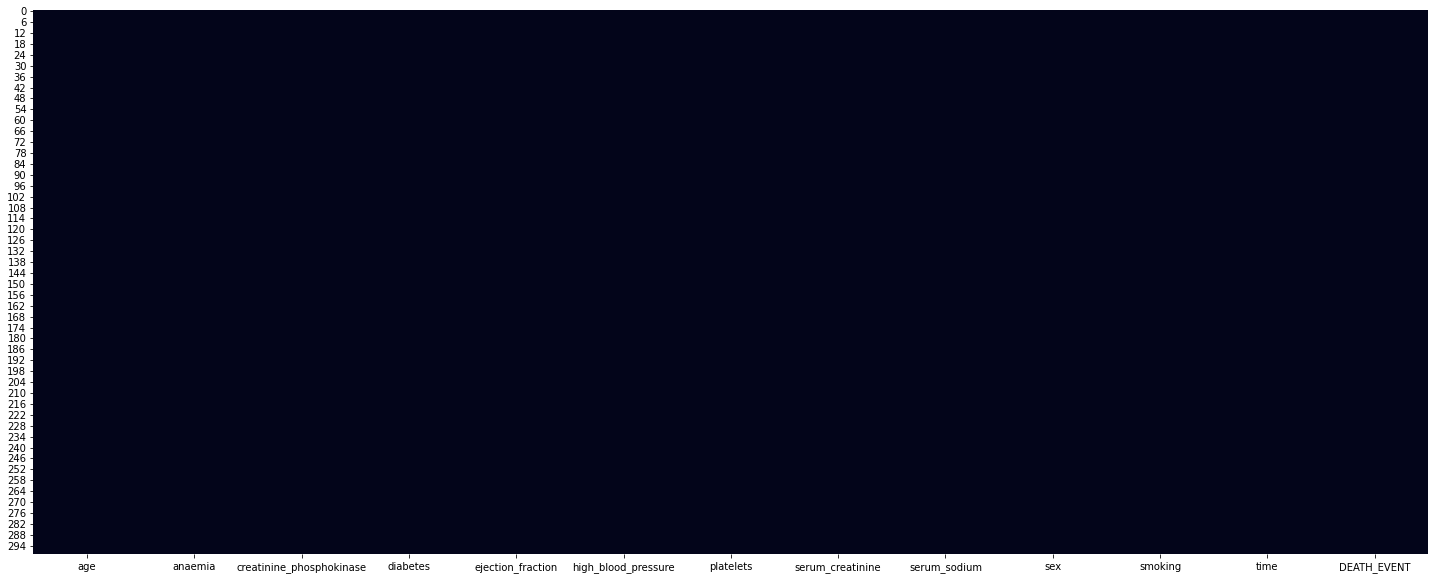

In [158]:
plt.figure(figsize=(25, 10))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

# **EXPLORASI DATA**

In [159]:
#melihat data pada indeks Death_Event
df.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


terlihat data unbalanced, karena total kematian oleh heart failure (96 events) tidak lebih setengah dari kematian bukan karena heart failure (203 events)

In [160]:
age = df[['age']]
platelets = df[['platelets']]

Text(0.5, 1.0, 'Visualiszing the unbalanced data')

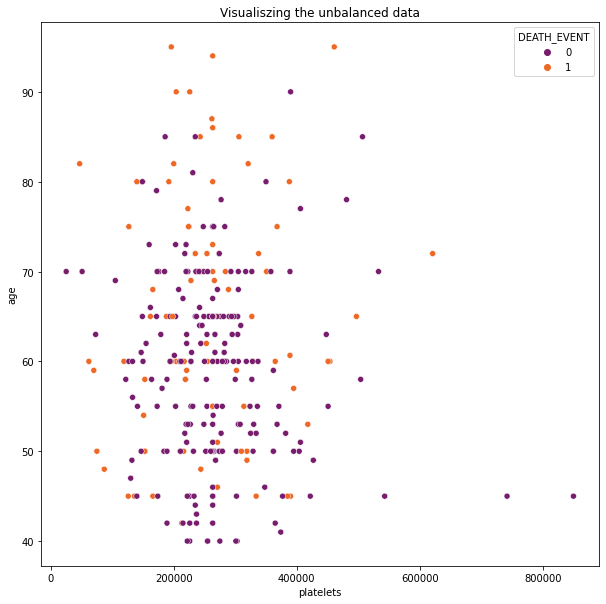

In [161]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'platelets', y = 'age', hue = 'DEATH_EVENT' , palette = 'inferno',data = df)
plt.title('Visualiszing the unbalanced data')

Text(0.5, 1.0, 'Visualiszing the unbalanced data')

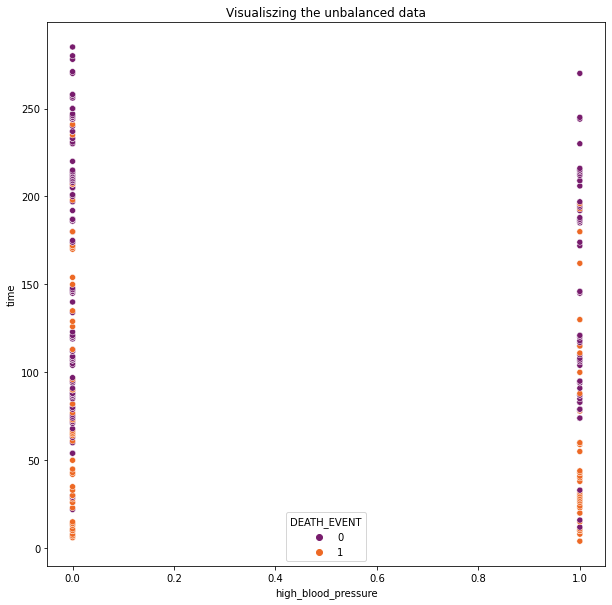

In [162]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'high_blood_pressure', y = 'time', hue = 'DEATH_EVENT' , palette = 'inferno',data = df)
plt.title('Visualiszing the unbalanced data')

# **DATA PREPROCESSING**

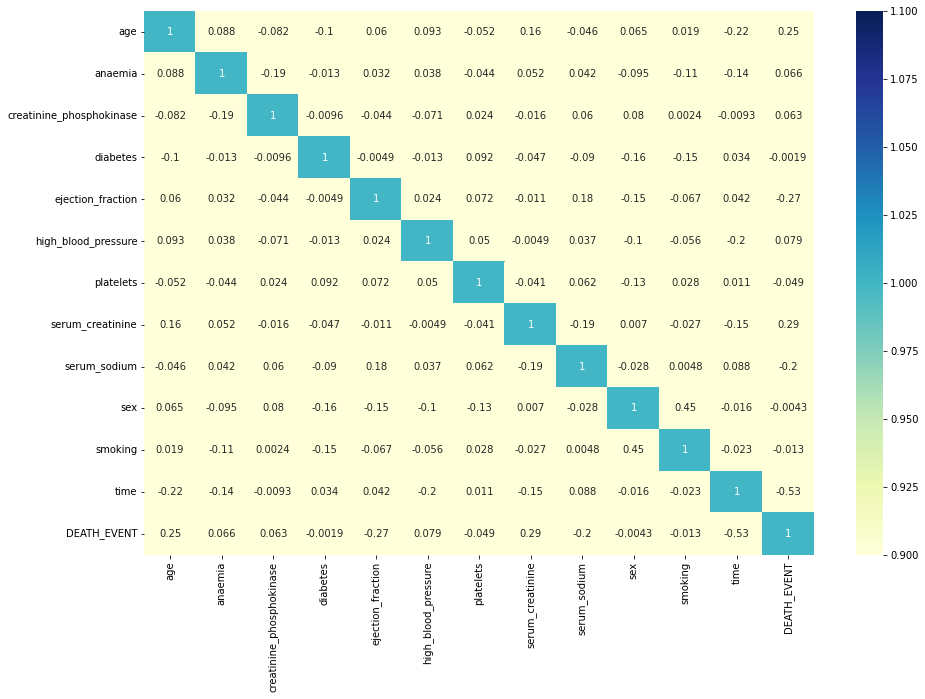

In [163]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), vmin = 1, vmax=1, cmap='YlGnBu', annot=True)

In [164]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


# **PENDEFINISIAN MODEL**

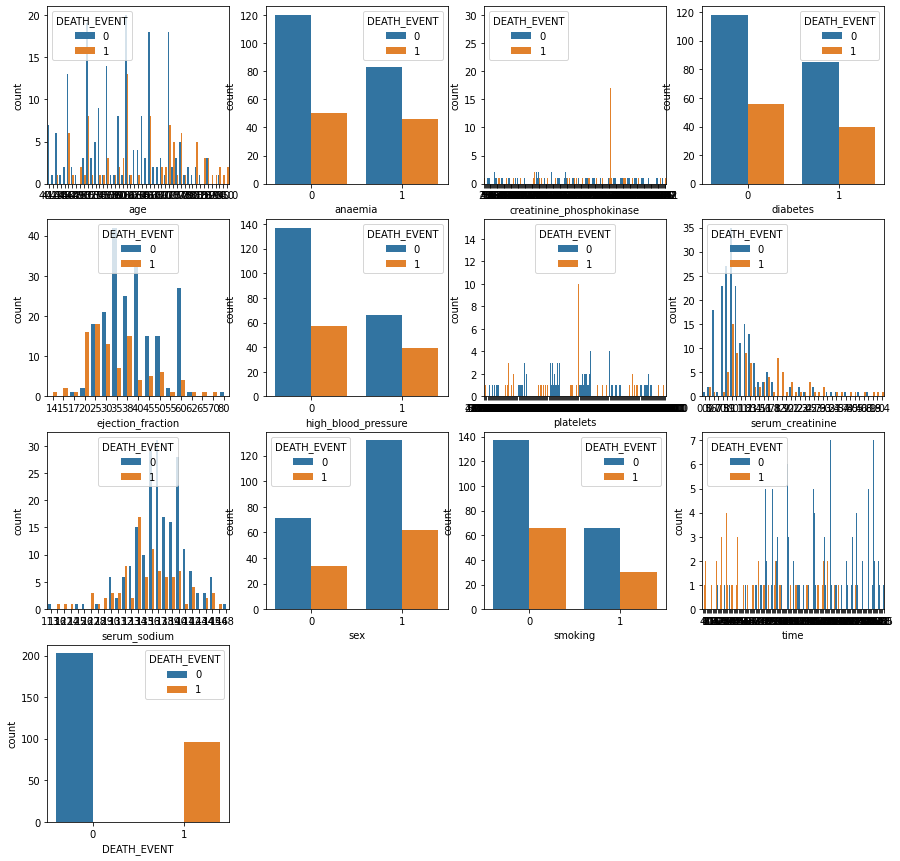

In [165]:
plt.figure(figsize=(15,15))
# for i, cat in enumerate(categorical_data):
for i, cat in enumerate(df):
  plt.subplot(4, 4, i+1)
  sns.countplot(data = df, x= cat, hue = 'DEATH_EVENT')

plt.show()

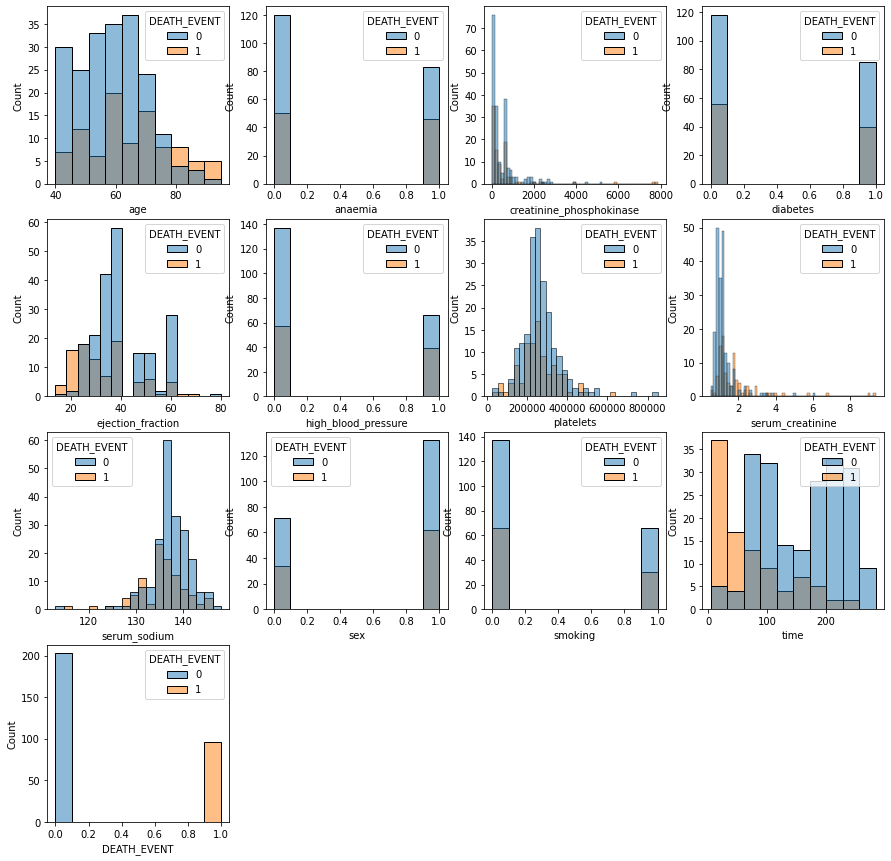

In [166]:
plt.figure(figsize=(15,15))
# for i, cat in enumerate(categorical_data):
for i, cat in enumerate(df):
  plt.subplot(4, 4, i+1)
  sns.histplot(data = df, x= cat, hue = 'DEATH_EVENT')

plt.show()

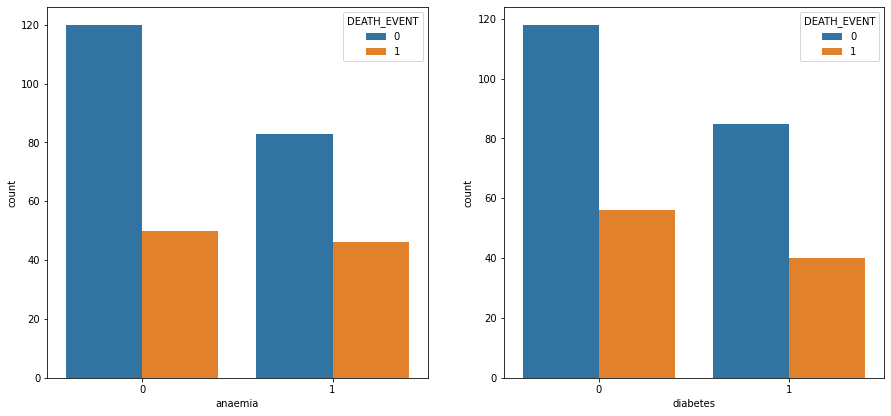

In [167]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
sns.countplot(data = df, x= 'anaemia', hue = 'DEATH_EVENT')
plt.subplot(2, 2, 2)
sns.countplot(data = df, x= 'diabetes', hue = 'DEATH_EVENT')

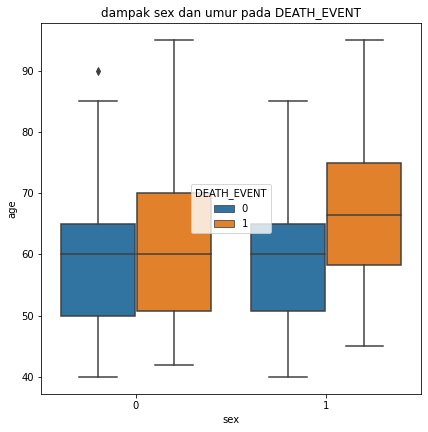

In [168]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
sns.boxplot(data = df, x= 'sex', y='age', hue = 'DEATH_EVENT')
plt.title('dampak sex dan umur pada DEATH_EVENT')
plt.show()
# plt.subplot(2, 2, 2)
# sns.countplot(data = df, x= 'diabetes', hue = 'DEATH_EVENT')

pada laki (sex=1) pada umur 55 - 75 memiliki tingkat kematian oleh gagal jantung, sedangkan pada perempuan (sex=0) tingkat kematian oleh gagal jantung berada pada umur 50-70 tahun.

## **Menganalisa keselamatan dari gagal jantung pada masing-masing parameter**

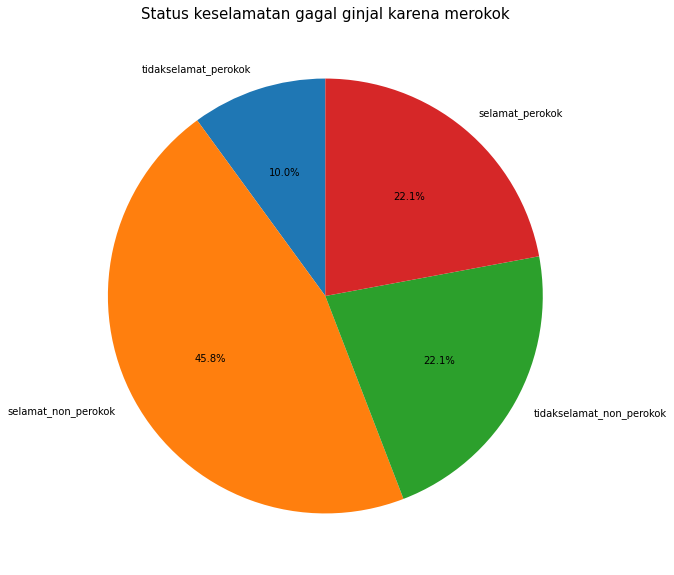

In [169]:
perokok = df[df['smoking']==1]
non_perokok = df[df['smoking']==0]

tidakselamat_perokok = perokok[perokok['DEATH_EVENT']==1]
selamat_perokok = perokok[perokok['DEATH_EVENT']==0]
tidakselamat_non_perokok = non_perokok[non_perokok['DEATH_EVENT']==1]
selamat_non_perokok = non_perokok[non_perokok['DEATH_EVENT']==0]

smoking_data = [len(tidakselamat_perokok), len(selamat_non_perokok), len(tidakselamat_non_perokok), len(selamat_perokok)]
smoking_labels = ['tidakselamat_perokok', 'selamat_non_perokok', 'tidakselamat_non_perokok', 'selamat_perokok']

plt.figure(figsize=(10,10))
plt.pie(smoking_data, labels = smoking_labels, autopct= '%.1f%%', startangle=90)

plt.title('Status keselamatan gagal ginjal karena merokok', fontsize=15)
plt.show()

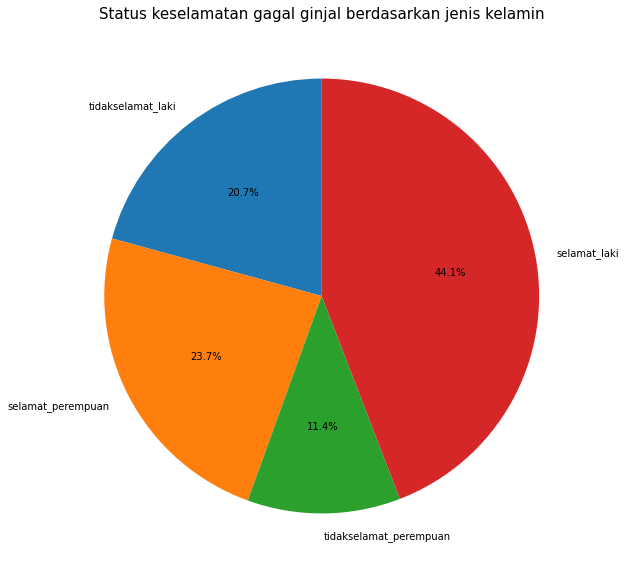

In [170]:
laki = df[df['sex']==1]
perempuan = df[df['sex']==0]

tidakselamat_laki = laki[laki['DEATH_EVENT']==1]
selamat_laki = laki[laki['DEATH_EVENT']==0]
tidakselamat_perempuan = perempuan[perempuan['DEATH_EVENT']==1]
selamat_perempuan = perempuan[perempuan['DEATH_EVENT']==0]

sex_data = [len(tidakselamat_laki), len(selamat_perempuan), len(tidakselamat_perempuan), len(selamat_laki)]
sex_labels = ['tidakselamat_laki', 'selamat_perempuan', 'tidakselamat_perempuan', 'selamat_laki']

plt.figure(figsize=(10,10))
plt.pie(sex_data, labels = sex_labels, autopct= '%.1f%%', startangle=90)

plt.title('Status keselamatan gagal ginjal berdasarkan jenis kelamin', fontsize=15)
plt.show()

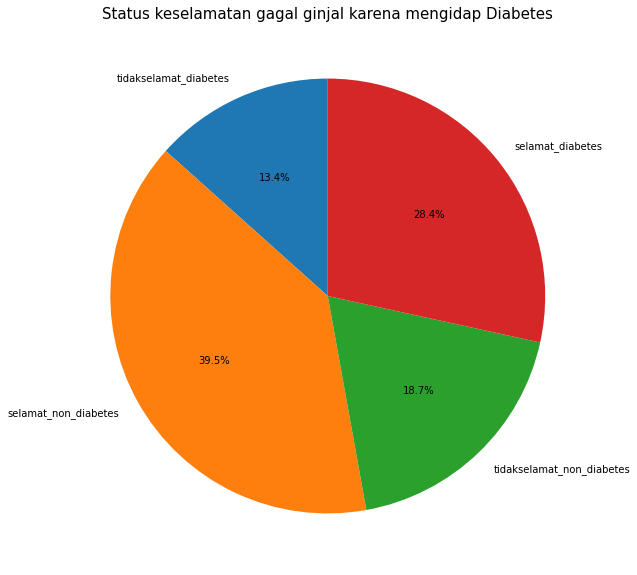

In [171]:

diabetes = df[df['diabetes']==1]
non_diabetes = df[df['diabetes']==0]

tidakselamat_diabetes = diabetes[diabetes['DEATH_EVENT']==1]
selamat_diabetes = diabetes[diabetes['DEATH_EVENT']==0]
tidakselamat_non_diabetes = non_diabetes[non_diabetes['DEATH_EVENT']==1]
selamat_non_diabetes = non_diabetes[non_diabetes['DEATH_EVENT']==0]

diabetes_data = [len(tidakselamat_diabetes), len(selamat_non_diabetes), len(tidakselamat_non_diabetes), len(selamat_diabetes)]
diabetes_labels = ['tidakselamat_diabetes', 'selamat_non_diabetes', 'tidakselamat_non_diabetes', 'selamat_diabetes']

plt.figure(figsize=(10,10))
plt.pie(diabetes_data, labels = diabetes_labels, autopct= '%.1f%%', startangle=90)

plt.title('Status keselamatan gagal ginjal karena mengidap Diabetes', fontsize=15)
plt.show()

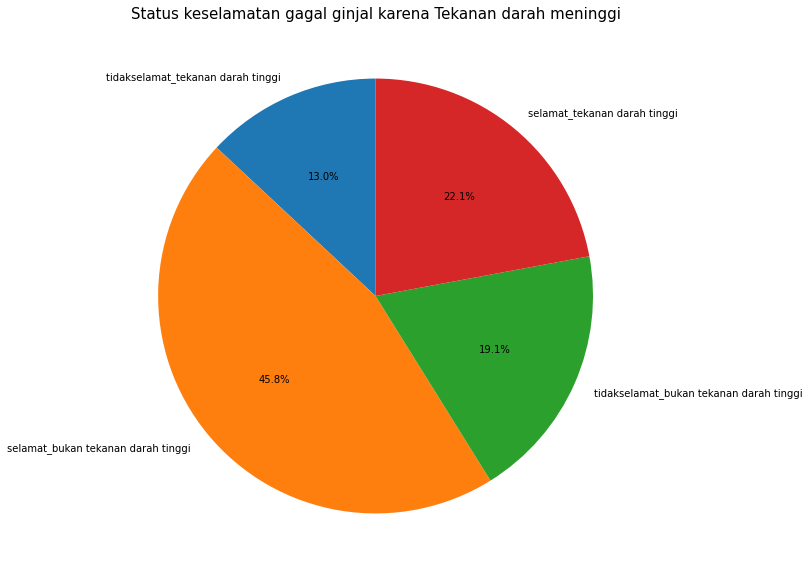

In [172]:

blood = df[df['high_blood_pressure']==1]
non_blood = df[df['high_blood_pressure']==0]

tidakselamat_blood = blood[blood['DEATH_EVENT']==1]
selamat_blood = blood[blood['DEATH_EVENT']==0]
tidakselamat_non_blood = non_blood[non_blood['DEATH_EVENT']==1]
selamat_non_blood = non_blood[non_blood['DEATH_EVENT']==0]

blood_data = [len(tidakselamat_blood), len(selamat_non_blood), len(tidakselamat_non_blood), len(selamat_blood)]
blood_labels = ['tidakselamat_tekanan darah tinggi', 'selamat_bukan tekanan darah tinggi', 'tidakselamat_bukan tekanan darah tinggi', 'selamat_tekanan darah tinggi']

plt.figure(figsize=(10,10))
plt.pie(blood_data, labels = blood_labels, autopct= '%.1f%%', startangle=90)

plt.title('Status keselamatan gagal ginjal karena Tekanan darah meninggi', fontsize=15)
plt.show()

# **PELATIHAN MODEL**

In [173]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [174]:
x = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

In [175]:
x_train, x_test, y_train, y_test =train_test_split (x, y, test_size=0.3, random_state=2)

In [176]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [177]:
accuracy_list = []

# **EVALUASI MODEL**

In [178]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
lr_prediction = lr.predict(x_test_scaled)
lr_accuracy = (round (accuracy_score(lr_prediction, y_test), 4)*100)
accuracy_list.append(lr_accuracy)

In [179]:
#SVM
svm = SVC()
svm.fit(x_train_scaled, y_train)
svm_prediction = svm.predict(x_test_scaled)
svm_accuracy = (round (accuracy_score(svm_prediction, y_test), 4)*100)
accuracy_list.append(svm_accuracy)

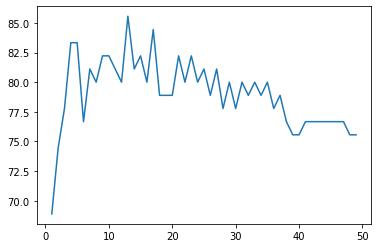

In [180]:
#KNN
knn_list = []
for k in range (1, 50):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_scaled, y_train)
  knn_prediction = knn.predict(x_test_scaled)
  knn_accuracy = (round (accuracy_score(knn_prediction, y_test), 4)*100)
  knn_list.append(knn_accuracy)
k = np.arange (1,50)
plt.plot(k, knn_list)

In [181]:
#Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt.fit(x_train_scaled, y_train)
dt_prediction = dt.predict(x_test_scaled)
dt_accuracy = (round (accuracy_score(dt_prediction, y_test), 4)*100)
accuracy_list.append(dt_accuracy)

In [182]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)
nb_prediction = nb.predict(x_test_scaled)
nb_accuracy = (round (accuracy_score(nb_prediction, y_test), 4)*100)
accuracy_list.append(nb_accuracy)

In [183]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
rf_prediction = rf.predict(x_test_scaled)
rf_accuracy = (round (accuracy_score(rf_prediction, y_test), 4)*100)
accuracy_list.append(rf_accuracy)

# **MODEL INFERENCE**

In [184]:
accuracy_list

[87.78, 85.56, 88.89, 80.0, 91.11]

In [234]:
Models = ['LogisticRegression', 'SVM', 'KNN', 'DT', 'NB', 'RF']
Accuracy = [87.78, 85.56, 88.89, 80.0, 91.11]
print(Models, '=', Accuracy)

['LogisticRegression', 'SVM', 'KNN', 'DT', 'NB', 'RF'] = [87.78, 85.56, 88.89, 80.0, 91.11]


# **PENGAMBILAN KEPUTUSAN**